## Hatdigits 3D Graphs

In [15]:
import uproot
import awkward as ak
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import os

%matplotlib widget

* Dataframe definition:

In [16]:
class ND280_dataset:
    def __init__(self, path):
        #tree_hattracks = uproot.open(path)['hatdigits']
        tree_hattracks = uproot.open(path)['hatdigits']
        
        df = tree_hattracks.arrays()
        tree = ak.to_dataframe(df)
        keys = tree.index.get_level_values('entry').unique()
        
        self.tree = tree
        self.keys = keys
        
    def __getitem__(self, i):
        key = self.keys[i]
        return self.tree.loc[key]
    
    def __len__(self):
        return len(self.keys)

Select desired path:
- path is the test version with which this code has been generated
- path_1 corresponds to events with a single particle involved
- path_2 corresponds to events with two particles involved

You can select the desired path by changing the #, and then Run All Cells

In [17]:
#path = "/nfs/pic.es/user/e/eriksen/data/pilar/treemaker.root"
#Title='Path'

In [18]:
path="/data/neutrinos/common/casado/T2K/HAT-Reco/treemaker_mu_minus_800.root"
Title='Path_1'

In [19]:
#path_2= "/data/neutrinos/common/casado/T2K/HAT-Reco/treemaker_mu_minus_800_proton_200.root"
#Title='Path_2'

Definition:

In [20]:
ds = ND280_dataset(path)

In [21]:
df = pd.DataFrame(ds.tree)

In [22]:
df_unique_entries = df.groupby('entry').first()

In [23]:
df_sel = df_unique_entries[df_unique_entries['event']==0] #change value between 0-9998

In [24]:
df_sel

,event,hat,plate,fem,fec,asic,channel,time,nsamples,adc,row,col,y,z,qmax,tmax,fwhm
entry,,,,,,,,,,,,,,,,,
0,0,0,0,2,1,3,9,144,52,246,4,24,849.315002,-1660.115967,292,154,24
1,0,0,0,2,1,3,10,91,68,246,4,25,849.315002,-1648.835938,650,113,22
2,0,0,0,2,1,3,11,86,49,257,4,26,849.315002,-1637.555908,1899,105,14
3,0,0,0,2,1,3,20,134,66,281,5,25,859.505005,-1648.835938,304,158,30
4,0,0,0,2,1,3,21,101,119,253,5,26,859.505005,-1637.555908,311,141,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,0,0,0,6,1,0,69,91,59,243,30,18,773.255005,-1727.796021,356,111,25
219,0,0,0,6,1,0,75,113,60,253,31,21,783.445007,-1693.955933,303,136,42
220,0,0,0,6,1,0,76,86,49,255,31,20,783.445007,-1705.235962,2093,105,14


**3D plots**

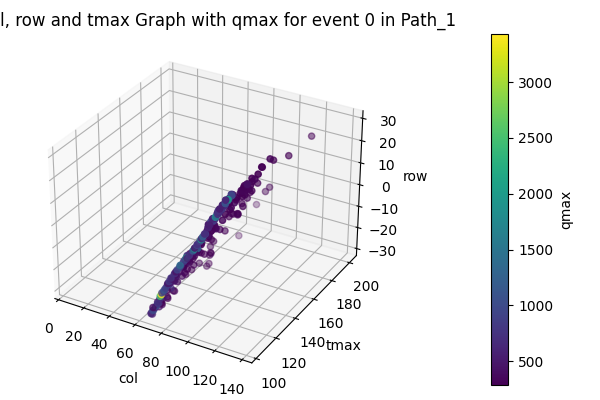

In [25]:
event_value=0
df_sel = df_unique_entries[df_unique_entries['event']== event_value]

x=[]
y=[]
z=[]
colors=[]


for fem_value in range(8):
    df_sel_fem = df_sel[df_sel['fem'] == fem_value]
    
    offset_row = 0 if fem_value < 4 else -32
    offset_col = (fem_value % 4) * 36 
    
    x.extend(df_sel_fem['col'] + offset_col)
    y.extend(df_sel_fem['tmax'])
    z.extend(df_sel_fem['row'] + offset_row)
    colors.extend(df_sel_fem['qmax'])
    

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(x, y, z, c=colors, cmap='viridis')

ax.set_xlabel('col')
ax.set_xlim(0, 144)
ax.set_ylabel('tmax')
ax.set_zlim(-32,32)
ax.set_zlabel('row')

ax.set_title(f'3D col, row and tmax Graph with qmax for event {event_value} in {Title}') 
cbar = fig.colorbar(sc, ax=ax, pad=0.2)
cbar.set_label('qmax')

plt.tight_layout()


2D version (without time):

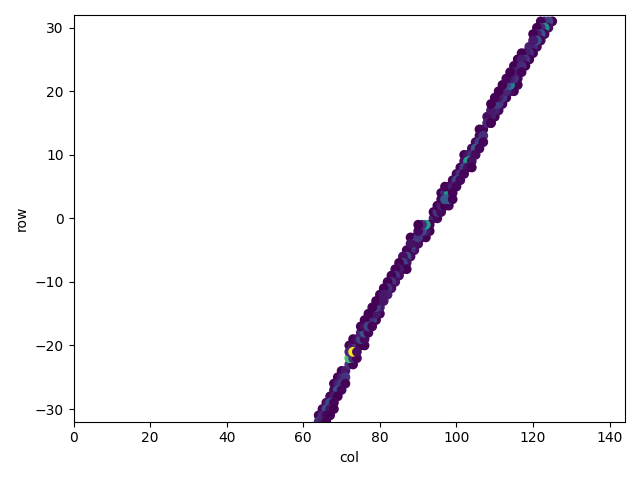

In [26]:
event_value = 0
df_sel = df_unique_entries[df_unique_entries['event'] == event_value]

x = []
y = []
colors = []

for fem_value in range(8):
    df_sel_fem = df_sel[df_sel['fem'] == fem_value]
    
    offset_row = 0 if fem_value < 4 else -32
    offset_col = (fem_value % 4) * 36
    
    x.extend(df_sel_fem['row'] + offset_row)
    y.extend(df_sel_fem['col'] + offset_col)
    colors.extend(df_sel_fem['qmax'])

fig = plt.figure()
ax = fig.add_subplot(111)
sc = ax.scatter(y, x, c=colors, cmap='viridis')

ax.set_xlabel('col')
ax.set_xlim(0, 144)
ax.set_ylabel('row')
ax.set_ylim(-32,32)

plt.tight_layout()